scikit-learn 机器学习

# 1 数据集
Iris (鸢尾花）数据集是安德森通过测量鸢尾花花朵的各个部分得到的，该数据集采用了三种不同的鸢尾花（山鸢尾，变色鸢尾和维吉尼亚鸢尾），分别表示了花朵的萼片和花瓣的长宽。scikit-learn 库中数据集为$150 \times 4$数组。

萼片长度 | 萼片宽度 | 花瓣长度  | 花瓣宽度
--- | --- | --- | ---
5.1 | 3.5 | 1.4 | 0.2 
4.9 | 3.0 | 1.4 | 0.2 
... | ... | ... | ...


In [3]:
from sklearn import datasets
iris = datasets.load_iris()
# 取前10行数据
iris.data[0:10]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

每一个花卉的种类，访问 iris 的 target 属性

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

总共150个数据，可能取值为0，1，2。分别表示不同鸢尾花的种类

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

# 2 统计分析

## 基础统计

## 萼片统计

In [32]:
import pandas as pd
frame = pd.DataFrame(iris.data,
                    columns=['sepal_length','sepal_width','petal_length','petal_width'])
frame['category']=iris.target
category_dict=dict(zip([0,1,2],['setosa','versicolor','virginica']))
frame['kinds'] = frame['category'].map(category_dict)
del frame['category']
frame.groupby('kinds').describe()

petal_length  petal_width  sepal_length  sepal_width
kinds                                                                 
setosa     count     50.000000    50.000000     50.000000    50.000000
           mean       1.464000     0.244000      5.006000     3.418000
           std        0.173511     0.107210      0.352490     0.381024
           min        1.000000     0.100000      4.300000     2.300000
           25%        1.400000     0.200000      4.800000     3.125000
           50%        1.500000     0.200000      5.000000     3.400000
           75%        1.575000     0.300000      5.200000     3.675000
           max        1.900000     0.600000      5.800000     4.400000
versicolor count     50.000000    50.000000     50.000000    50.000000
           mean       4.260000     1.326000      5.936000     2.770000
           std        0.469911     0.197753      0.516171     0.313798
           min        3.000000     1.000000      4.900000     2.000000
           25%        4.000000     1.200000      5.600000     2.525000
           50%        4.350000     1.300000      5.900000     2.800000
           75%        4.600000     1.500000      6.300000     3.000000
           max        5.100000     1.800000      7.000000     3.400000
virginica  count     50.000000    50.000000     50.000000    50.000000
           mean       5.552000     2.026000      6.588000     2.974000
           std        0.551895     0.274650      0.635880     0.322497
           min        4.500000     1.400000      4.900000     2.200000
           25%        5.100000     1.800000      6.225000     2.800000
           50%        5.550000     2.000000      6.500000     3.000000
           75%        5.875000     2.300000      6.900000     3.175000
           max        6.900000     2.500000      7.900000     3.800000

## 直方图统计

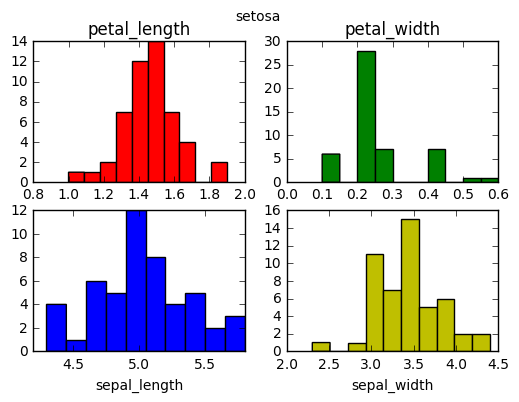

In [104]:
groups = list(frame.groupby('kinds'))
current_group = groups[0]
petal_length = current_group[1]['petal_length']
petal_width = current_group[1]['petal_width']
sepal_length = current_group[1]['sepal_length']
sepal_width = current_group[1]['sepal_width']
plt.figure()
plt.suptitle(current_group[0]); 
plt.subplot(221)
plt.hist(petal_length,color='r')
plt.title('petal_length')
plt.subplot(222)
plt.hist(petal_width,color='g')
plt.title('petal_width')
plt.subplot(223)
plt.hist(sepal_length,color='b')
plt.xlabel('sepal_length')
plt.subplot(224)
plt.hist(sepal_width,color='y')
plt.xlabel('sepal_width')
plt.show()

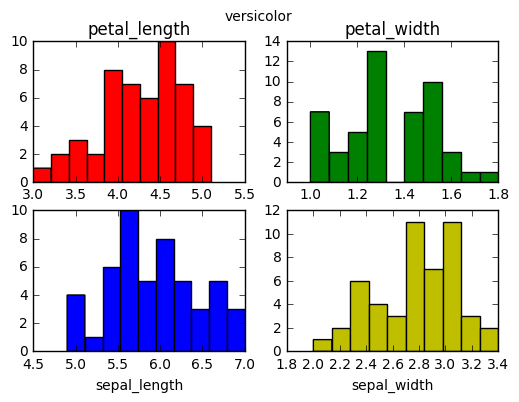

In [105]:
groups = list(frame.groupby('kinds'))
current_group = groups[1]
petal_length = current_group[1]['petal_length']
petal_width = current_group[1]['petal_width']
sepal_length = current_group[1]['sepal_length']
sepal_width = current_group[1]['sepal_width']
plt.figure()
plt.suptitle(current_group[0]); 
plt.subplot(221)
plt.hist(petal_length,color='r')
plt.title('petal_length')
plt.subplot(222)
plt.hist(petal_width,color='g')
plt.title('petal_width')
plt.subplot(223)
plt.hist(sepal_length,color='b')
plt.xlabel('sepal_length')
plt.subplot(224)
plt.hist(sepal_width,color='y')
plt.xlabel('sepal_width')
plt.show()

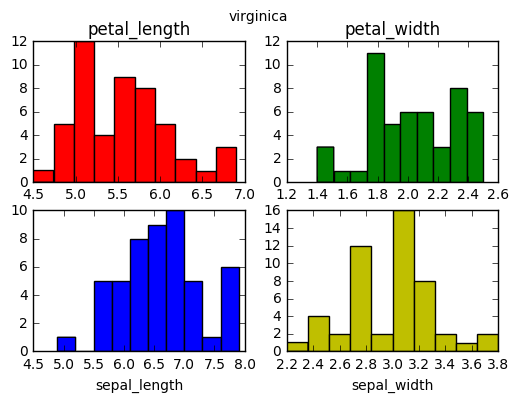

In [106]:
groups = list(frame.groupby('kinds'))
current_group = groups[2]
petal_length = current_group[1]['petal_length']
petal_width = current_group[1]['petal_width']
sepal_length = current_group[1]['sepal_length']
sepal_width = current_group[1]['sepal_width']
plt.figure()
plt.suptitle(current_group[0]); 
plt.subplot(221)
plt.hist(petal_length,color='r')
plt.title('petal_length')
plt.subplot(222)
plt.hist(petal_width,color='g')
plt.title('petal_width')
plt.subplot(223)
plt.hist(sepal_length,color='b')
plt.xlabel('sepal_length')
plt.subplot(224)
plt.hist(sepal_width,color='y')
plt.xlabel('sepal_width')
plt.show()

# 3 绘制散点图

## 萼片散点图

+ x轴  
萼片的长度
+ y轴  
萼片的宽度

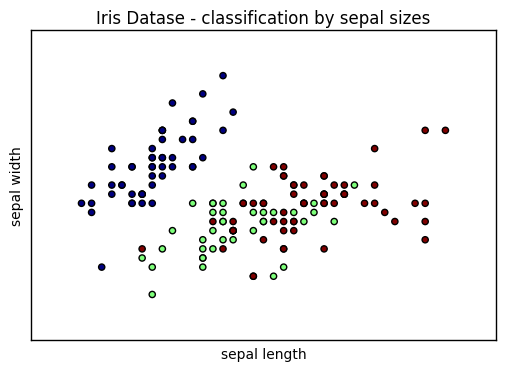

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpathes
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data[:,0]
y = iris.data[:,1]
species = iris.target
x_min, x_max = x.min() - 0.5, x.max() + 0.5
y_min, y_max = y.min() - 0.5, y.max() + 0.5
plt.figure()
plt.title(u'Iris Datase - classification by sepal sizes')
plt.scatter(x,y,c=species)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## 花瓣散点图

+ x轴  
萼片的长度
+ y轴  
萼片的宽度

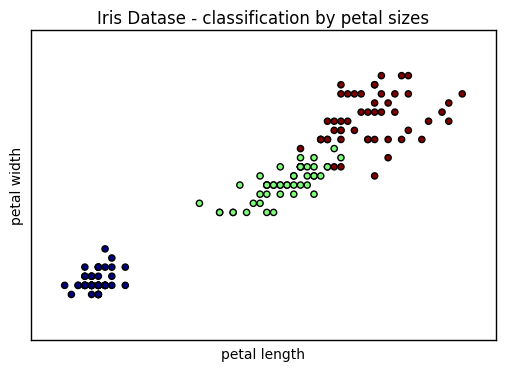

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpathes
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data[:,2]
y = iris.data[:,3]
species = iris.target
x_min, x_max = x.min() - 0.5, x.max() + 0.5
y_min, y_max = y.min() - 0.5, y.max() + 0.5
plt.figure()
plt.title(u'Iris Datase - classification by petal sizes')
plt.scatter(x,y,c=species)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# 4 主成分分析
我们用花瓣、萼片的长和宽四个维度表达出测量的数据，但是显示是三维空间，无法再展示四维数据，上面一个步骤中，分别使用萼片和花瓣的测量数据制作的，那么怎样在一幅图中把四个测量数据整合起来。  

**主成分分析法** (Prinical Component Analysis) 可以降低系统的维数目，但是也能够保留各个数据点的特征信息，其中新生成的各维叫*主成分*，针对上述数据，我们将四维数据减低到三维后，可以通过3D散点图展示出来。
scikit-learn 库通过fit_transform()函数来降维，再新的数据展示出来。

Feature Convariance Matrix:
[[ 0.68112222 -0.03900667  1.26519111  0.51345778]
 [-0.03900667  0.18675067 -0.319568   -0.11719467]
 [ 1.26519111 -0.319568    3.09242489  1.28774489]
 [ 0.51345778 -0.11719467  1.28774489  0.57853156]]


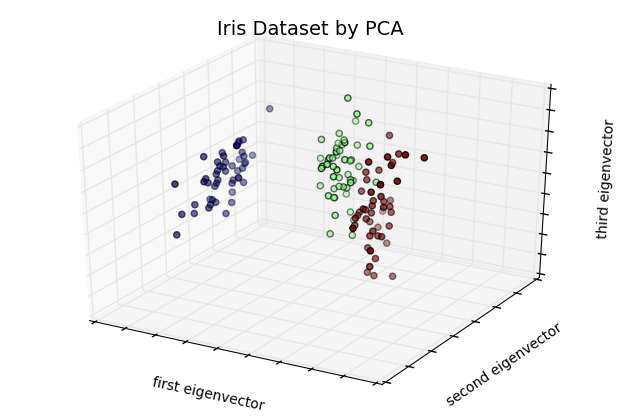

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data[:,1]
y = iris.data[:,2]
species = iris.target
pca = PCA(n_components=3)
x_reduced = pca.fit_transform(iris.data)
print 'Feature Convariance Matrix:'
print pca.get_covariance()
# draw 3d
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('Iris Dataset by PCA',size=14)
ax.scatter(x_reduced[:,0],x_reduced[:,1],x_reduced[:,2],c=species)
ax.set_xlabel('first eigenvector')
ax.set_ylabel('second eigenvector')
ax.set_zlabel('third eigenvector')
ax.w_xaxis.set_ticklabels(())
ax.w_yaxis.set_ticklabels(())
ax.w_zaxis.set_ticklabels(())
plt.show()

# 5 k-邻近分析
针对已有的数据，创建一个分类器，给定一种鸢尾花的测量数据，判断该鸢尾花属于哪一种类别。k-邻近算法思想非常简单，对于已有的数据，构建一个分类器，对于未知的花卉数据，判断与其最近的k个已有花卉数据的种类，根据少数服从多数的原则，判断未知花卉的种类。在这里一个非常重要的概念是距离，为了方便，我们选择欧式距离作为最近判断。$$d=\sqrt(\Delta petal\_length^2 + \Delta petal\_width^2 + \Delta sepal\_length^2 + \Delta sepal\_width^2)$$ 
为了验证模型的正确，对于已有的150条数据，选择$70%$为训练数据（training data),剩下的为验证数据（testing data)。

In [108]:
import numpy as np
np.random.seed(0)
iris = datasets.load_iris()
x = iris.data
y = iris.target
i = np.random.permutation(len(iris.data))
x_train = x[i[:-45]]
y_train = y[i[:-45]]
x_test = x[i[-45:]]
y_test = y[i[-45:]]
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [109]:
knn.predict(x_test)

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1,
       1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [110]:
y_test

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1,
       1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [112]:
result = knn.predict(x_test) - (y_test)
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

正确率为96%，再绘制出分界面

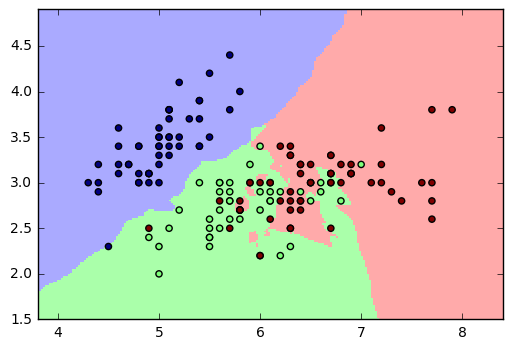

In [113]:
from matplotlib.colors import ListedColormap
x = iris.data[:,:2]
y = iris.target
x_min,x_max = x[:,0].min() -.5, x[:,0].max() + .5
y_min,y_max = x[:,1].min() -.5, x[:,1].max() + .5
cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])
h = .02
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
knn = KNeighborsClassifier()
knn.fit(x,y)
Z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.show()

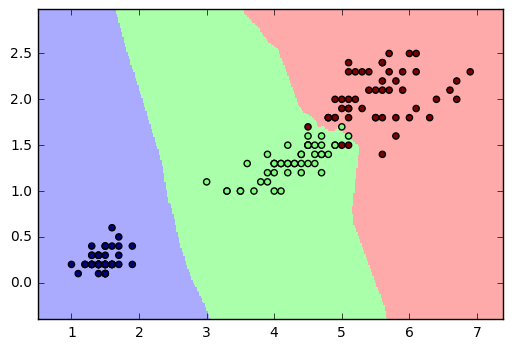

In [114]:
from matplotlib.colors import ListedColormap
x = iris.data[:,2:4]
y = iris.target
x_min,x_max = x[:,0].min() -.5, x[:,0].max() + .5
y_min,y_max = x[:,1].min() -.5, x[:,1].max() + .5
cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])
h = .02
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
knn = KNeighborsClassifier()
knn.fit(x,y)
Z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.show()

# 6 支持向量机

SVM（support vector machines) 是一系列机器学习方法， 可分为SVR（support vector regression，支持向量回归）和SVC（support vector classification，支持向量分类）

## 支持向量机分类

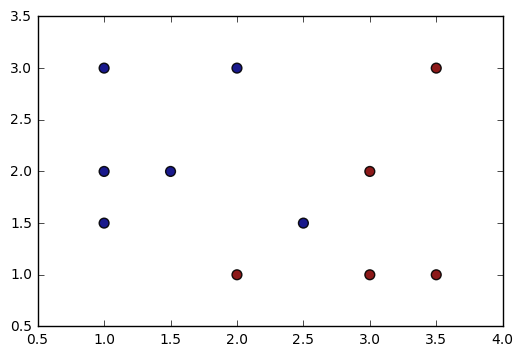

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
x = np.array([[1,3],[1,2],[1,1.5],[1.5,2],[2,3],[2.5,1.5],
             [2,1],[3,1],[3,2],[3.5,1],[3.5,3]])
y = [0]*6 + [1]*5
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)
plt.show()

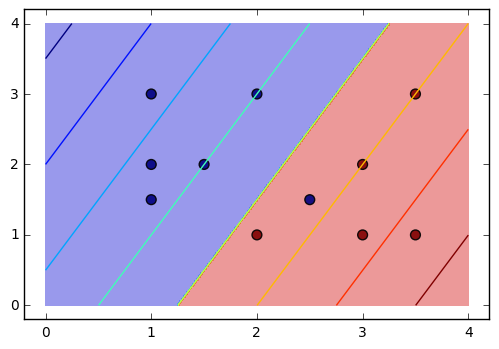

In [8]:
svc = svm.SVC(kernel='linear').fit(x,y)
X, Y = np.mgrid[0:4:200j,0:4:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z>0,alpha=0.4)
plt.contour(X,Y,Z,color=['k'],linestyle=['-'],level=[0])
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)
plt.show()

In [10]:
svc.predict([1.5,2.5])

/Users/gaufung/Anaconda/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([0])

In [11]:
svc.predict([2.5,1])

/Users/gaufung/Anaconda/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

正则化参数C对结果的印象  
C越大，泛化能力越小  
C越小，泛化能力越大

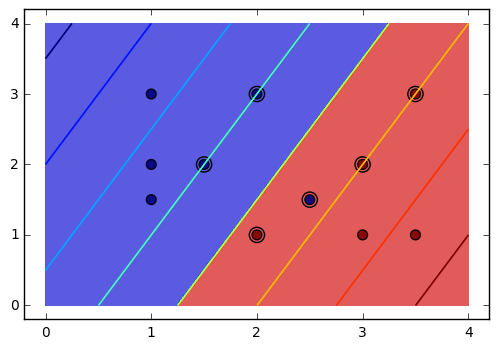

In [14]:
svc = svm.SVC(kernel='linear',C=1).fit(x,y)
X, Y = np.mgrid[0:4:200j,0:4:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z>0,alpha=0.4)
plt.contour(X,Y,Z,color=['k','k','k'],linestyle=['--','-','--'],level=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], s=120, facecolors='none')
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)
plt.show()

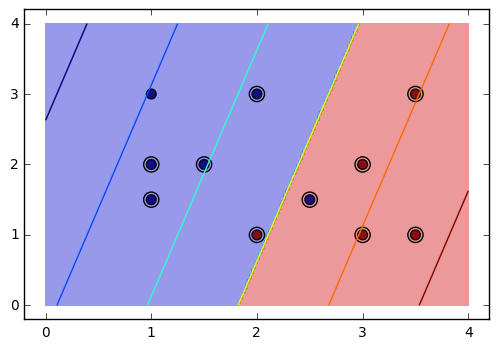

In [15]:
svc = svm.SVC(kernel='linear',C=0.1).fit(x,y)
X, Y = np.mgrid[0:4:200j,0:4:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z>0,alpha=0.4)
plt.contour(X,Y,Z,color=['k','k','k'],linestyle=['--','-','--'],level=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], s=120, facecolors='none')
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)
plt.show()

### 非线性SVC

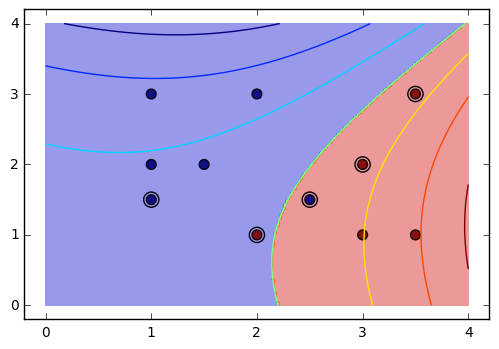

In [16]:
svc = svm.SVC(kernel='poly',C=1,degree=3).fit(x,y)
X, Y = np.mgrid[0:4:200j,0:4:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z>0,alpha=0.4)
plt.contour(X,Y,Z,color=['k','k','k'],linestyle=['--','-','--'],level=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], s=120, facecolors='none')
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)
plt.show()

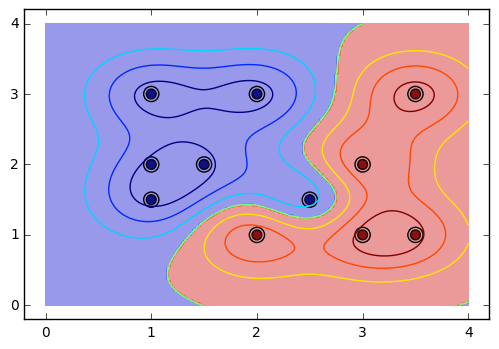

In [17]:
svc = svm.SVC(kernel='rbf',C=1,gamma=3).fit(x,y)
X, Y = np.mgrid[0:4:200j,0:4:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z>0,alpha=0.4)
plt.contour(X,Y,Z,color=['k','k','k'],linestyle=['--','-','--'],level=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], s=120, facecolors='none')
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)
plt.show()

## Iris数据
SVC 将数据分类成3个数据，使用非线性决策边界。

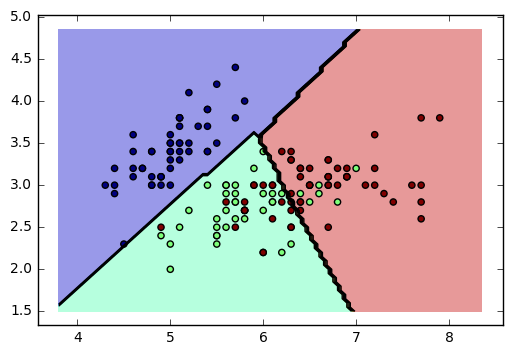

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
iris =datasets.load_iris()
x = iris.data[:,:2]
y = iris.target
h = 0.5
svc = svm.SVC(kernel='linear',C=1.0).fit(x,y)
x_min,x_max = x[:,0].min() - .5, x[:,0].max() +.5
y_min,y_max = x[:,1].min() - .5, x[:,1].max() +.5
h = 0.05
X, Y = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))
Z = svc.predict(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z,alpha=0.4)
plt.contour(X,Y,Z,colors='k')
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

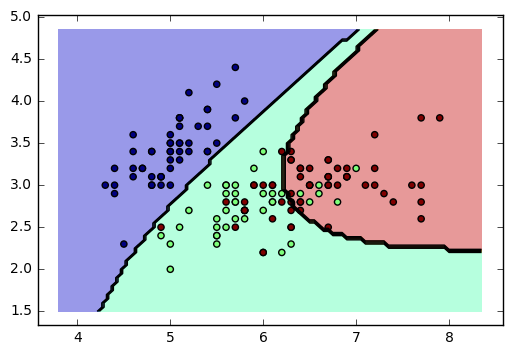

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
iris =datasets.load_iris()
x = iris.data[:,:2]
y = iris.target
h = 0.5
svc = svm.SVC(kernel='poly',C=1.0,degree=3).fit(x,y)
x_min,x_max = x[:,0].min() - .5, x[:,0].max() +.5
y_min,y_max = x[:,1].min() - .5, x[:,1].max() +.5
h = 0.05
X, Y = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))
Z = svc.predict(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z,alpha=0.4)
plt.contour(X,Y,Z,colors='k')
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

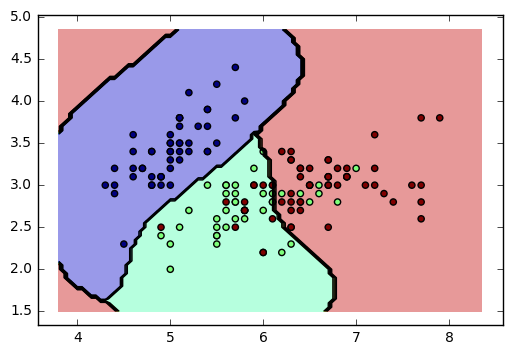

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
iris =datasets.load_iris()
x = iris.data[:,:2]
y = iris.target
h = 0.5
svc = svm.SVC(kernel='rbf',C=1.0,gamma=3).fit(x,y)
x_min,x_max = x[:,0].min() - .5, x[:,0].max() +.5
y_min,y_max = x[:,1].min() - .5, x[:,1].max() +.5
h = 0.05
X, Y = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))
Z = svc.predict(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z,alpha=0.4)
plt.contour(X,Y,Z,colors='k')
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()